In [80]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 
from sklearn.preprocessing import normalize

df = pd.read_csv("../../songs_plus_dates.csv")
data1 = df[df['Genre1'] == 'Rock']
data2 = df[df['Genre1'] == 'Hip Hop']

In [81]:
data1

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
83,83,Creepin' On The Mayor,Adam Sandler,/a/adam+sandler/creepin+on+the+mayor_20176471....,oh shit is that them crazy fucks from across...,oh shit is that them crazi fuck from across t...,crazy safe sound stupid dirty shittin safe unt...,"['UH', '_SP', 'NN', '_SP', 'VBZ', 'IN', 'PRP',...",Rock,Pop,comedy,comic,176.0,126.0,2004,2000s
84,84,Mr. Bake-O,Adam Sandler,/a/adam+sandler/mr+bake+o_10002543.html,i'm sitting in my chair watching the tv ...,i 'm sit in my chair watch the tv it 's not e...,crazy wicked last sweet baked chair tv plenty ...,"['_SP', 'PRP', 'VBP', 'VBG', 'IN', 'PRP$', 'NN...",Rock,Pop,comedy,comic,275.0,153.0,1996,1990s
85,85,Steve Polychronopolous,Adam Sandler,/a/adam+sandler/steve+polychronopolous_2000393...,i'm a big fuckin' dick i'm a pain in your ass...,i 'm a big fuckin ' dick i 'm a pain in your ...,big last tight extra polychronopolous pansy op...,"['PRP', 'VBP', 'DT', 'JJ', 'NN', ""''"", 'NNP', ...",Rock,Pop,comedy,comic,201.0,121.0,1996,1990s
86,86,The Adventures Of The Cow,Adam Sandler,/a/adam+sandler/the+adventures+of+the+cow_2000...,performed by adam sandler frank and randi t...,perform by adam sandler frank and randi trans...,6th little first hot french first big classy s...,"['VBN', 'IN', 'NNP', 'NNP', '_SP', 'NNP', '_SP...",Rock,Pop,comedy,comic,493.0,256.0,1996,1990s
87,87,The Psychotic Legend Of Uncle Donnie,Adam Sandler,/a/adam+sandler/the+psychotic+legend+of+uncle+...,holy shit this boat is sweet uncle donnie. i...,holi shit thi boat is sweet uncl donni . it m...,holy sweet fast fucking fucking sunny fucking ...,"['JJ', 'NNP', '_SP', 'DT', 'NN', 'VBZ', 'JJ', ...",Rock,Pop,comedy,comic,110.0,90.0,1999,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33435,33585,As I Said Before,Zebra,/z/zebra/as+i+said+before_10198473.html,and i said before i don't want no more and i...,and i said befor i do n't want no more and i ...,insane insane sure crazy pleasant little secon...,"['CC', 'PRP', 'VBD', 'IN', '_SP', 'PRP', 'VBP'...",Rock,Electronic,album rock,glam metal,228.0,79.0,1983,1980s
33436,33586,Bears,Zebra,/z/zebra/bears_20456403.html,in the middle of winter the trees are bare an...,in the middl of winter the tree are bare and ...,bare only precious cold precious middle winter...,"['IN', 'DT', 'NN', 'IN', 'NN', '_SP', 'DT', 'N...",Rock,Electronic,album rock,glam metal,204.0,97.0,1984,1980s
33437,33587,Hard Living Without You,Zebra,/z/zebra/hard+living+without+you_10198468.html,nothing to say no place to hide i can't find ...,noth to say no place to hide i ca n't find a ...,good right wrong hard hard rough hard hard har...,"['NN', 'TO', 'VB', 'DT', 'NN', 'TO', 'VB', '_S...",Rock,Electronic,album rock,glam metal,165.0,66.0,1986,1980s
33438,33588,When You Get There,Zebra,/z/zebra/when+you+get+there_10198475.html,you wake up in the morning and you're not fee...,you wake up in the morn and you 're not feel ...,same gentle alone hard worth front good mornin...,"['PRP', 'VBP', 'RP', 'IN', 'DT', 'NN', '_SP', ...",Rock,Electronic,album rock,glam metal,171.0,104.0,1983,1980s


In [12]:
data2['POS'].dropna(inplace=True)

In [56]:
data1['POS'].dropna(inplace=True)

C:\Users\jonas\Anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [82]:
data = pd.concat([data1, data2], axis = 0)

tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(data1.POS.values.astype(str))
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [37]:
data2

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
2806,2806,25 to Life,Eminem,/e/eminem/25+to+life_20883525.html,too late for the other side caught in a chase...,too late for the other side caught in a chase...,late other other devoted fucking baggy fucking...,"['RB', 'JJ', 'IN', 'DT', 'JJ', 'NN', '_SP', 'V...",Hip Hop,Electronic,detroit hip hop,g funk,687.0,295.0,2010,2010s
2807,2807,3 A.M.,Eminem,/e/eminem/3+am_20789506.html,oh oh oh yea oh yea oh yea oh oh oh oh ...,oh oh oh yea oh yea oh yea oh oh oh oh yea oh...,good good horrible deep next sure naked dead c...,"['UH', 'UH', '_SP', 'UH', 'UH', '_SP', 'UH', '...",Hip Hop,Electronic,detroit hip hop,g funk,696.0,354.0,2009,2000s
2808,2808,Buffalo Bill,Eminem,/e/eminem/buffalo+bill_20866830.html,it fits perfect better watch out sucka now ...,it fit perfect better watch out sucka now i g...,perfect full ja- ra- polegic lohan naked such ...,"['PRP', 'VBZ', 'JJ', '_SP', 'RBR', 'VB', 'RP',...",Hip Hop,Electronic,detroit hip hop,g funk,537.0,342.0,2009,2000s
2809,2809,Business,Eminem,/e/eminem/business_10106011.html,marshall sounds like an s.o.s. holy whack un...,marshal sound like an s.o. . holi whack unlyr...,unlyrical mobile further 'bout flawless honest...,"['NNP', '_SP', 'VBZ', 'IN', 'DT', 'NN', '.', '...",Hip Hop,Electronic,detroit hip hop,g funk,583.0,373.0,2002,2000s
2810,2810,Careful What You Wish For,Eminem,/e/eminem/careful+what+you+wish+for_20793604.html,so this is it this is what i wished for just...,so thi is it thi is what i wish for just is n...,different little green slim classic fantastic ...,"['CC', 'DT', 'VBZ', 'PRP', '_SP', 'DT', 'VBZ',...",Hip Hop,Electronic,detroit hip hop,g funk,566.0,241.0,2009,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33403,33553,Life Story,Z-Ro,/z/z+ro/life+story_20234648.html,[z-ro] nobody seems to understand that my bra...,[ z-ro ] nobodi seem to understand that my br...,stable fable offensive relative chemical only ...,"['-LRB-', 'NNP', ':', 'NNP', '-RRB-', '_SP', '...",Hip Hop,Rock,chopped and screwed,dirty south rap,585.0,318.0,2017,2010s
33404,33554,Lord Tell Me Why,Z-Ro,/z/z+ro/lord+tell+me+why_20243448.html,chorus - 2x lord tell me why ooh child th...,choru - 2x lord tell me whi ooh child thing a...,ooh ready only real right hunted high blunted ...,"['_SP', 'NN', 'HYPH', 'NN', '_SP', 'NNP', 'VB'...",Hip Hop,Rock,chopped and screwed,dirty south rap,615.0,327.0,2015,2010s
33405,33555,Talkin' Down On Me,Z-Ro,/z/z+ro/talkin+down+on+me_20681859.html,[z-ro] since i been out by myself i keep tha...,[ z-ro ] sinc i been out by myself i keep tha...,last rude h loose full invisible safe second c...,"['-LRB-', 'NNP', ':', 'NNP', '-RRB-', '_SP', '...",Hip Hop,Rock,chopped and screwed,dirty south rap,419.0,241.0,2002,2000s
33406,33556,That'z Who I Am,Z-Ro,/z/z+ro/thatz+who+i+am_20681817.html,[z-ro] houston texas is my city ridgemont 4 ...,[ z-ro ] houston texa is my citi ridgemont 4 ...,glock broad other about automatic own main bus...,"['-LRB-', 'NNP', ':', 'NNP', '-RRB-', '_SP', '...",Hip Hop,Rock,chopped and screwed,dirty south rap,591.0,293.0,2004,2000s


In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [38]:
#X = TruncatedSVD(n_components=50, random_state=0).fit_transform(tf_idf)

In [31]:
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(X)

In [78]:
kmeans = KMeans(n_clusters=8, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [76]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=70, cmap='viridis')
plt.title('PCA')
plt.savefig('K_Means/PCA_K-Means_Lyrics.png', bbox_inches = "tight")

Text(0.5, 1.0, 'PCA')

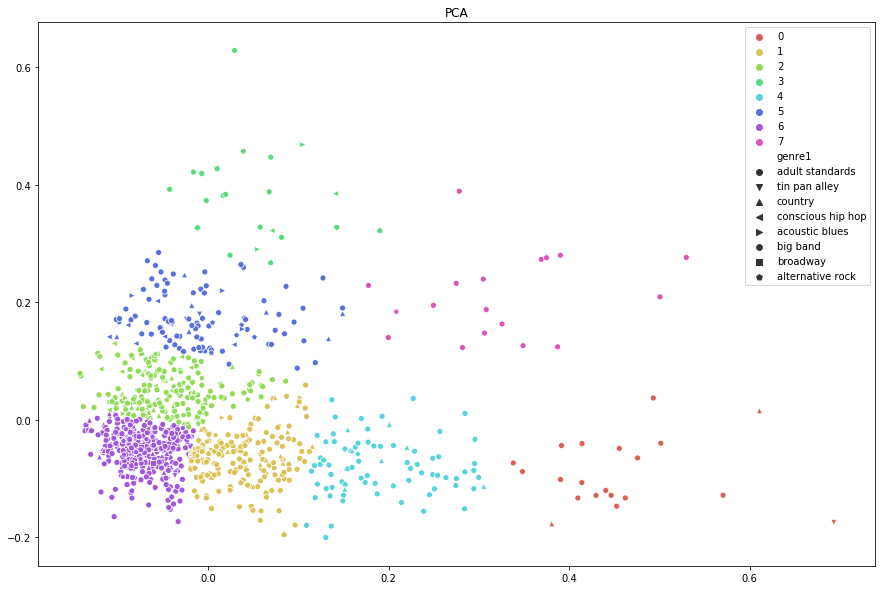

In [79]:
markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', 'o', 'v', '^')
plt.figure(figsize=(15,10))
sns.scatterplot(Y_sklearn[:, 0], Y_sklearn[:, 1],hue=prediction, style=data1.genre1, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))
plt.title('PCA')
#plt.savefig('K_Means/K-Means_Artists.png', bbox_inches = "tight")

([<matplotlib.patches.Wedge at 0x16f2ef3cec8>,
 [Text(23.999487847507506, 0.1567898508814413, 'comedy'),
  Text(13.436211219082239, 19.886382981231367, 'album rock'),
  Text(-9.286207670419973, 22.130665310872, 'country'),
  Text(-14.650979780724207, 19.009176506750904, 'alternative metal'),
  Text(-20.973977816774823, 11.665858499974942, 'adult standards'),
  Text(-22.92009064798452, 7.118247304510607, 'country rock'),
  Text(-23.18332002185953, 6.207549658604994, 'canadian pop'),
  Text(-23.33077773005803, 5.628037891719302, 'baroque pop'),
  Text(-23.662581723642496, 4.010265099957865, 'beatlesque'),
  Text(-23.9775049329165, 1.0388730393869277, 'britpop'),
  Text(-22.812704066937414, -7.455235284975053, 'alternative rock'),
  Text(-19.740294184085442, -13.649937198601409, 'comic'),
  Text(-19.419837395438762, -14.102124504297864, 'glam metal'),
  Text(-17.225158271598502, -16.71208911292606, 'classic rock'),
  Text(-14.593153762786875, -19.05360499369238, 'british folk'),
  Text(-1

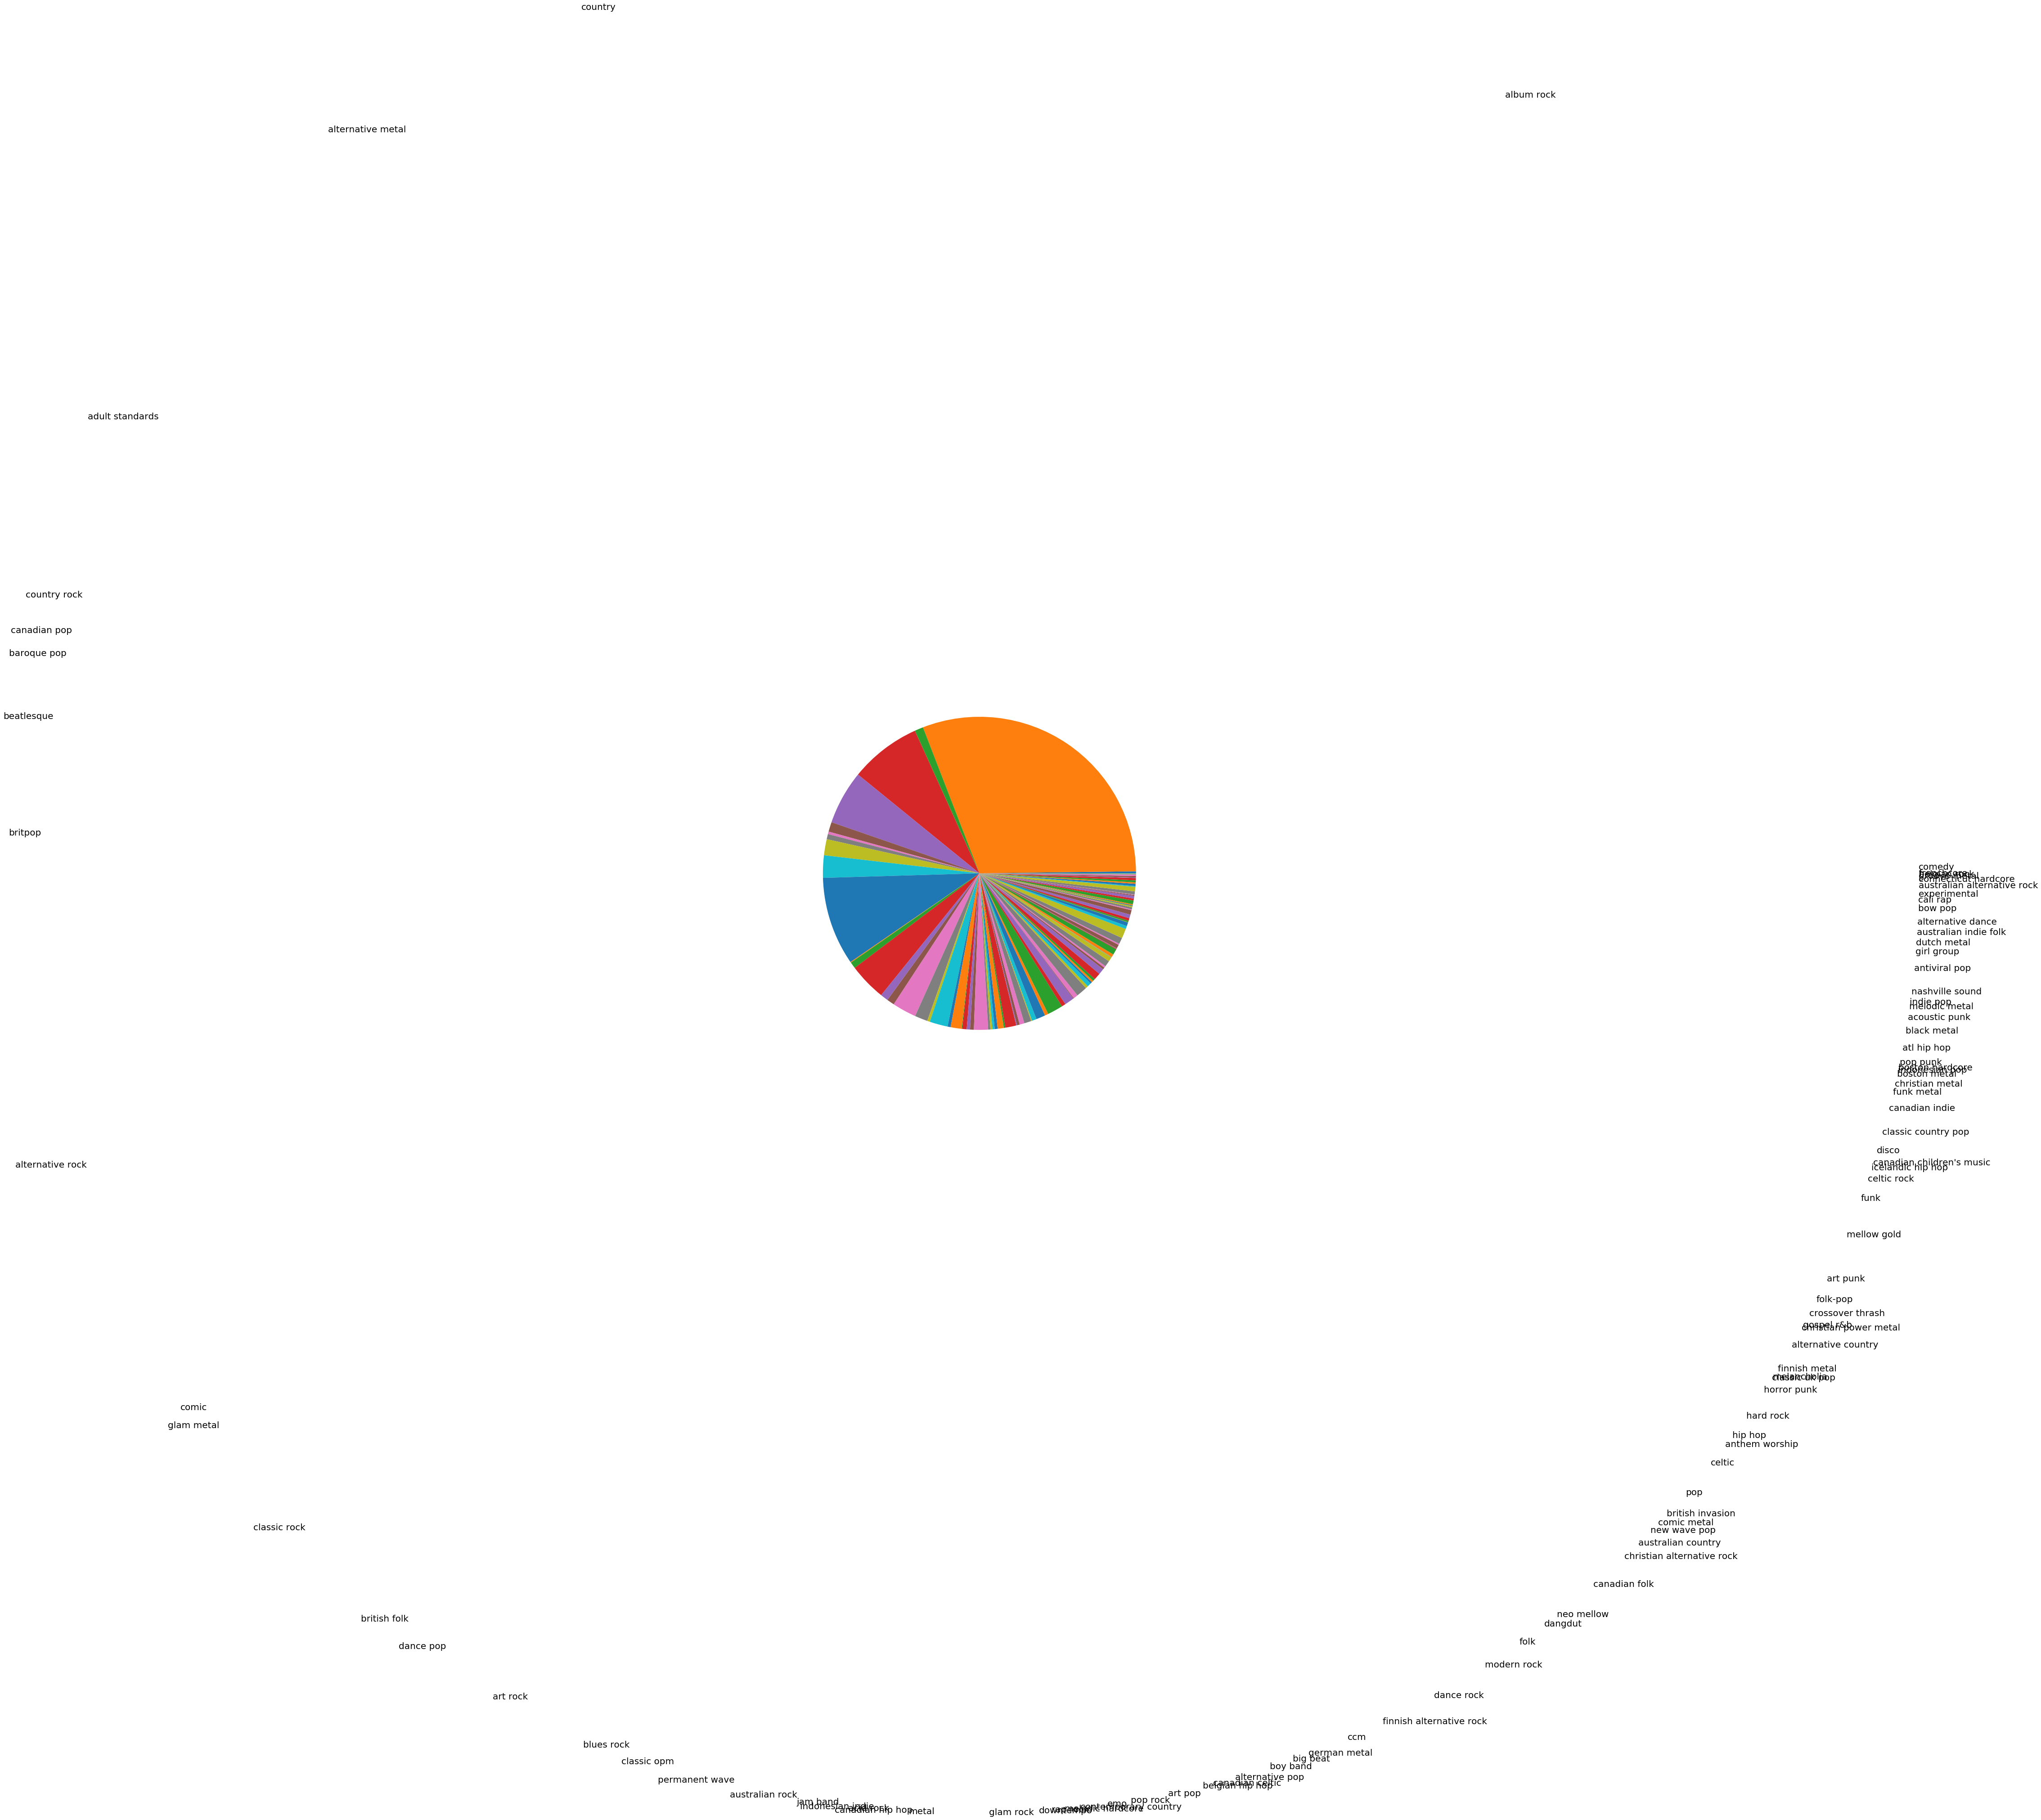

In [83]:
from collections import Counter
counts = Counter(data1.genre1)
plt.pie([float(v) for v in counts.values()], labels=[str(k) for k in counts],
           autopct=None, textprops={'fontsize': 20},  radius=4, labeldistance=6, rotatelabels = False)